# 0.1 | Installing Required Libraries

In [108]:
# Bootstrap Package Installs
import importlib
import subprocess
import sys
libraries = {
    "numpy": "numpy",
    "polars": "polars",
    "matplotlib": "matplotlib",
    "seaborn": "seaborn",
    "scikit-learn": "sklearn",
    "xgboost": "xgboost",
    "joblib": "joblib",
    "opencv-python": "cv2",
    "cvxopt": "cvxopt",
    "graphviz": "graphviz",
    "pickle": "pickle",
    "logging": "logging",
    "imbalanced-learn": "imbalanced-learn",
}

for pip_name, import_name in libraries.items():
    try:
        importlib.import_module(import_name)
        print(f"{pip_name} Already Installed")
    except ImportError:
        print(f"{pip_name} Installing")
        subprocess.check_call([sys.executable, "-m","pip","install","--upgrade", pip_name])
print("Libraries Ready")


numpy Already Installed
polars Already Installed
matplotlib Already Installed
seaborn Already Installed
scikit-learn Already Installed
xgboost Already Installed
joblib Already Installed
opencv-python Already Installed
cvxopt Already Installed
graphviz Already Installed
pickle Already Installed
logging Already Installed
imbalanced-learn Installing
Libraries Ready


# Definitions

# 0.2 | Pathing // Config

In [159]:
# # Libraries
# import os
# import time
# import random
# import glob
# import joblib
# import pickle
# import logging
# import random
# import datetime as dt
# from pathlib import Path

# # Helpers
# import urllib.request
# from urllib.request import urlretrieve

# import cv2
# import cvxopt as cvxopt
# from cvxopt import solvers

# import polars as pl
# import numpy as np

# from math import log2

# # from math import *
# # Graphing
# import seaborn as sns

# import pylab as pylab
# from pylab import rcParams

# from mpl_toolkits.mplot3d import Axes3D

# import matplotlib.pyplot as plt
# # from matplotlib.colors import ListedColorMap

# # Modelling
# import xgboost as xgb

# from sklearn import datasets
# from sklearn import tree
# from sklearn import metrics



# from sklearn.naive_bayes import GaussianNB

# from sklearn.impute import KNNImputer

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import cross_val_predict
# from sklearn.model_selection import cross_validate

# from sklearn.ensemble import (GradientBoostingClassifier)
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import  RandomForestClassifier

# import graphviz
# from sklearn import metrics
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import mean_squared_error

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import scale

# from sklearn.neighbors import KNeighborsClassifier


# For simplicity:
import os
import numpy as np

import polars as pl
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from math import logs2
from matplotlib.lines import Line2D

import logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(
    level= logging.INFO,
    format="%(levelname)s: %(message)s"
)
logger = logging.getLogger()
logInfo = logging.info

ImportError: cannot import name 'logs2' from 'math' (unknown location)


>>> Target: family


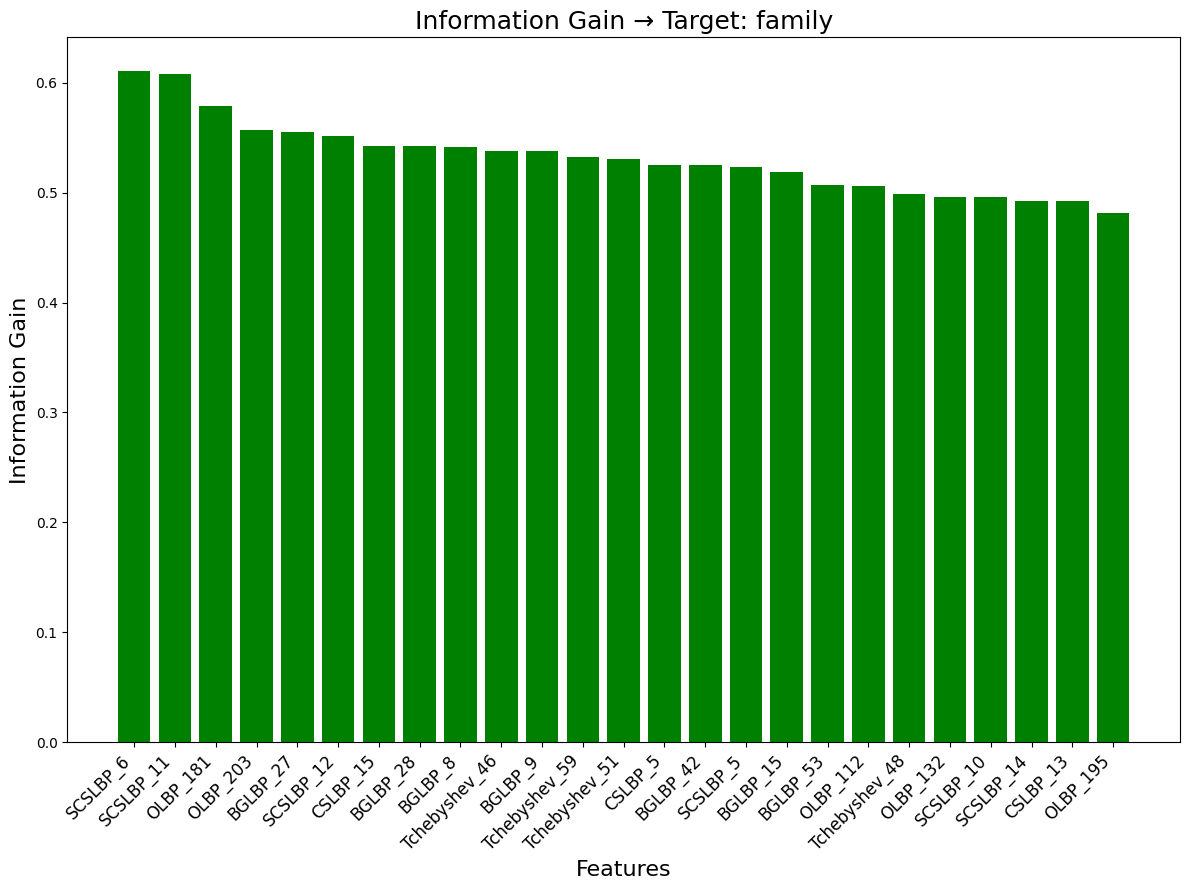

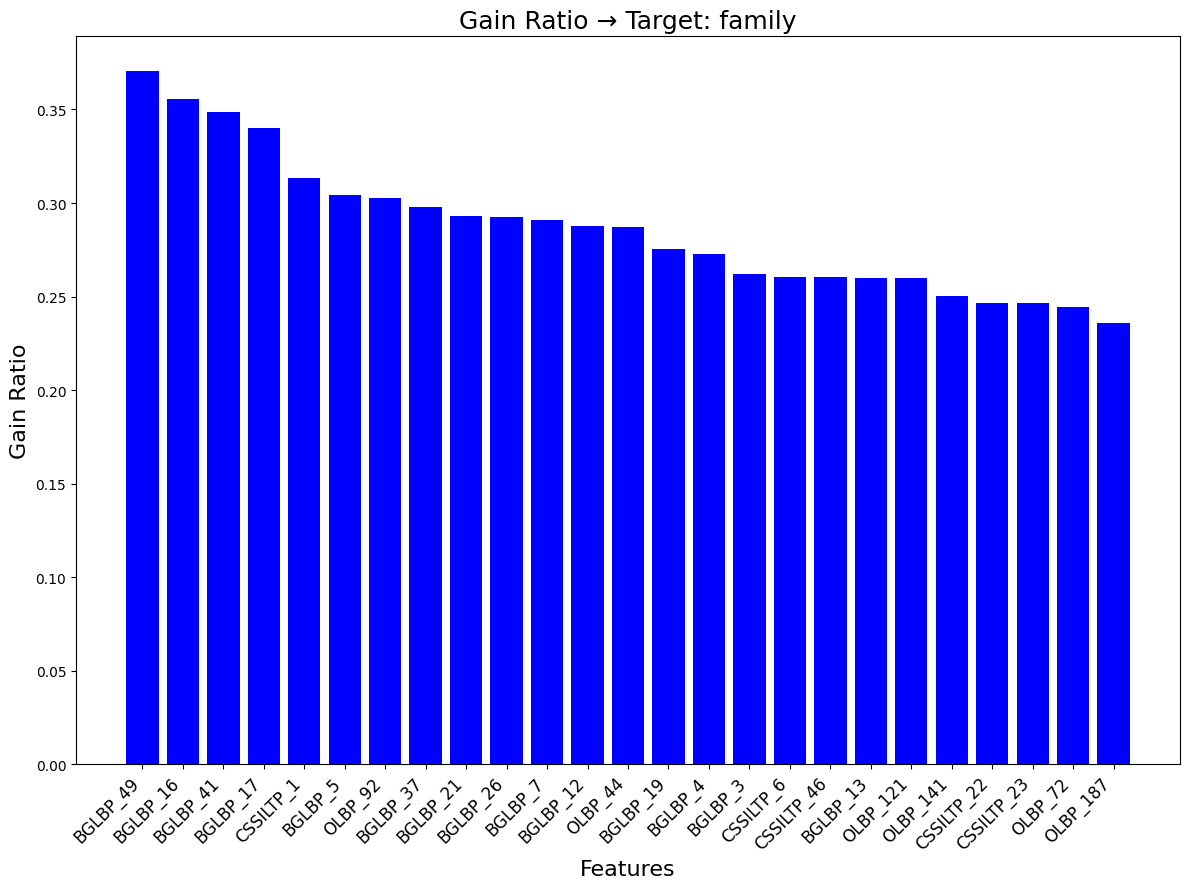


>>> Target: genus


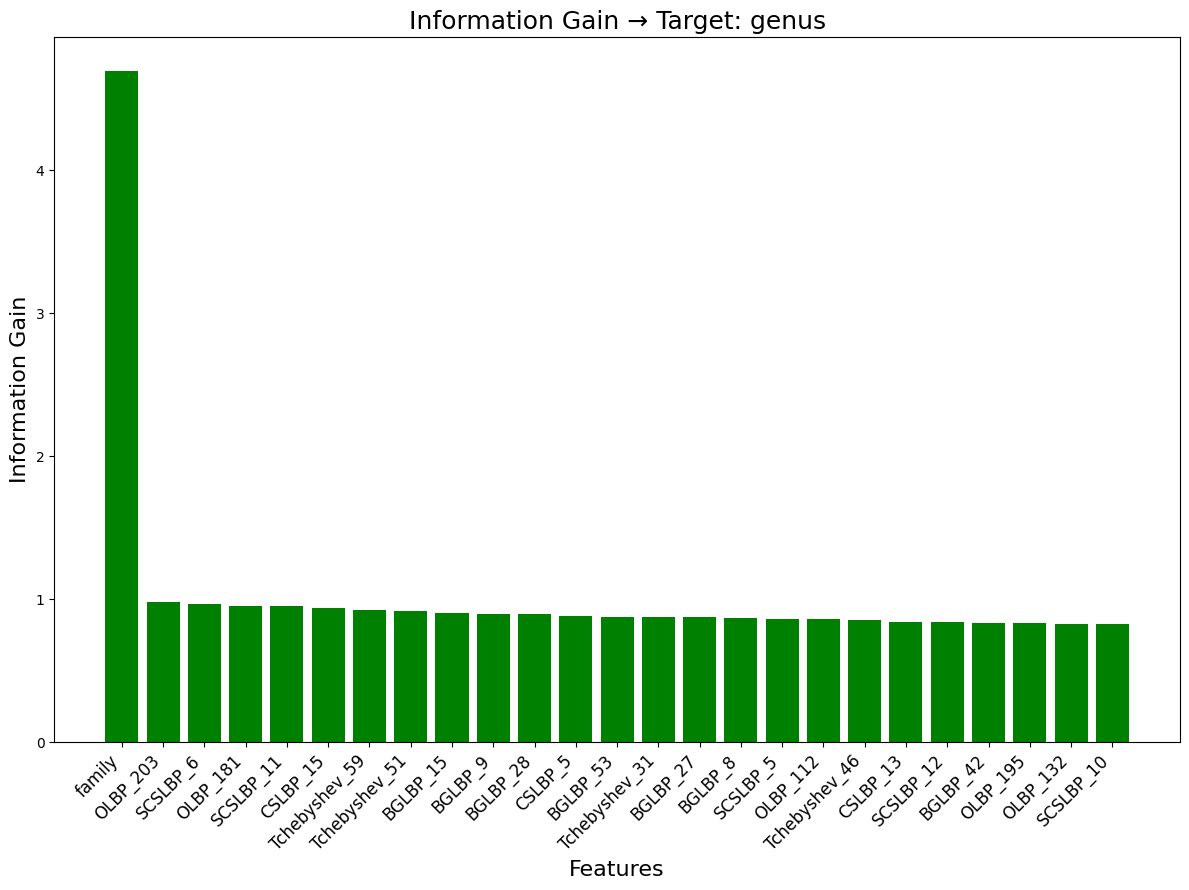

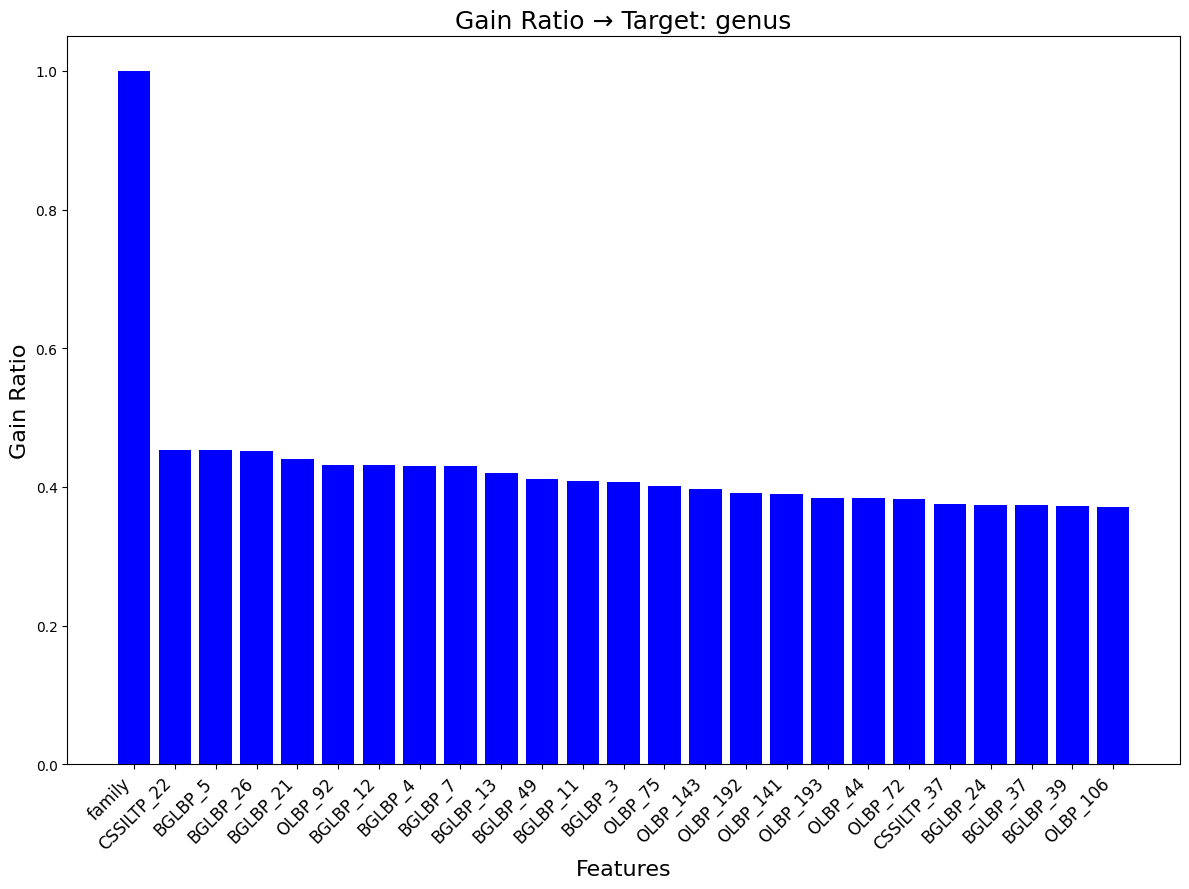


>>> Target: species


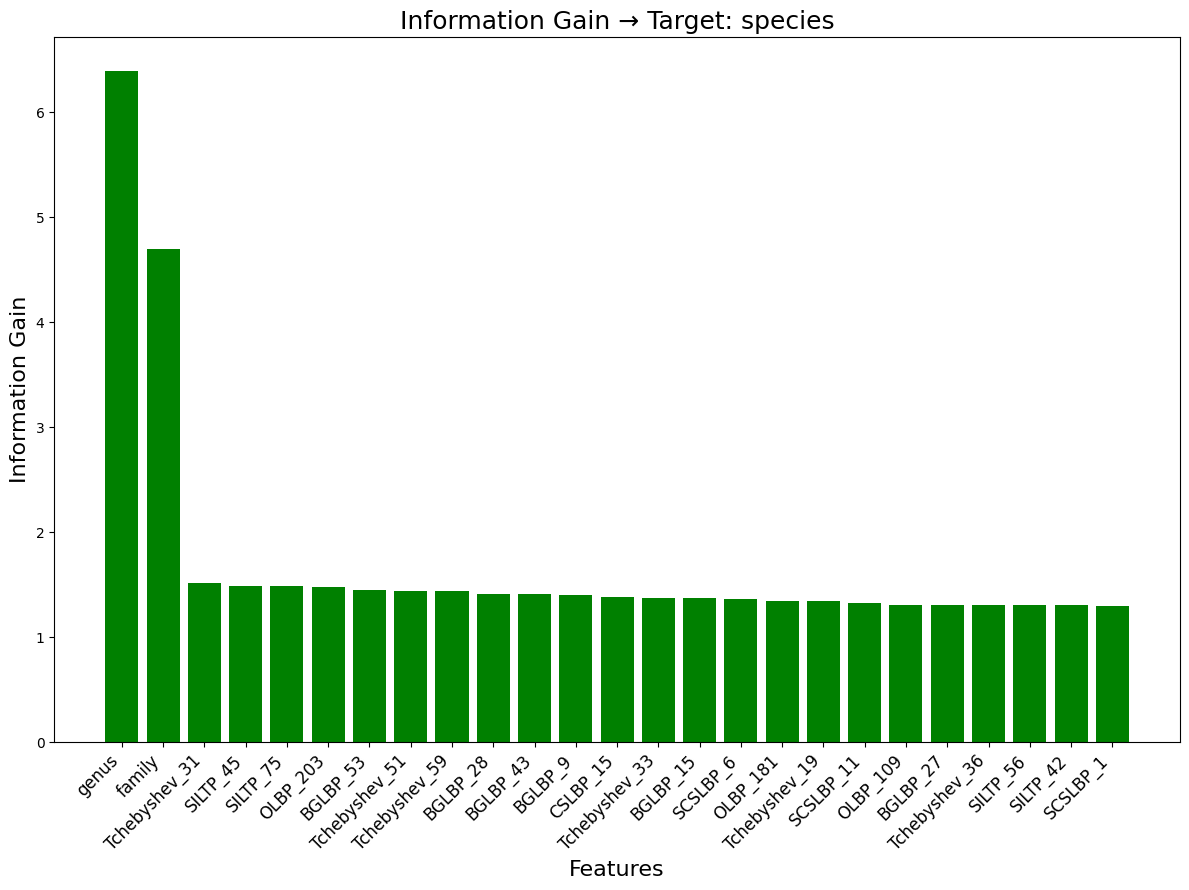

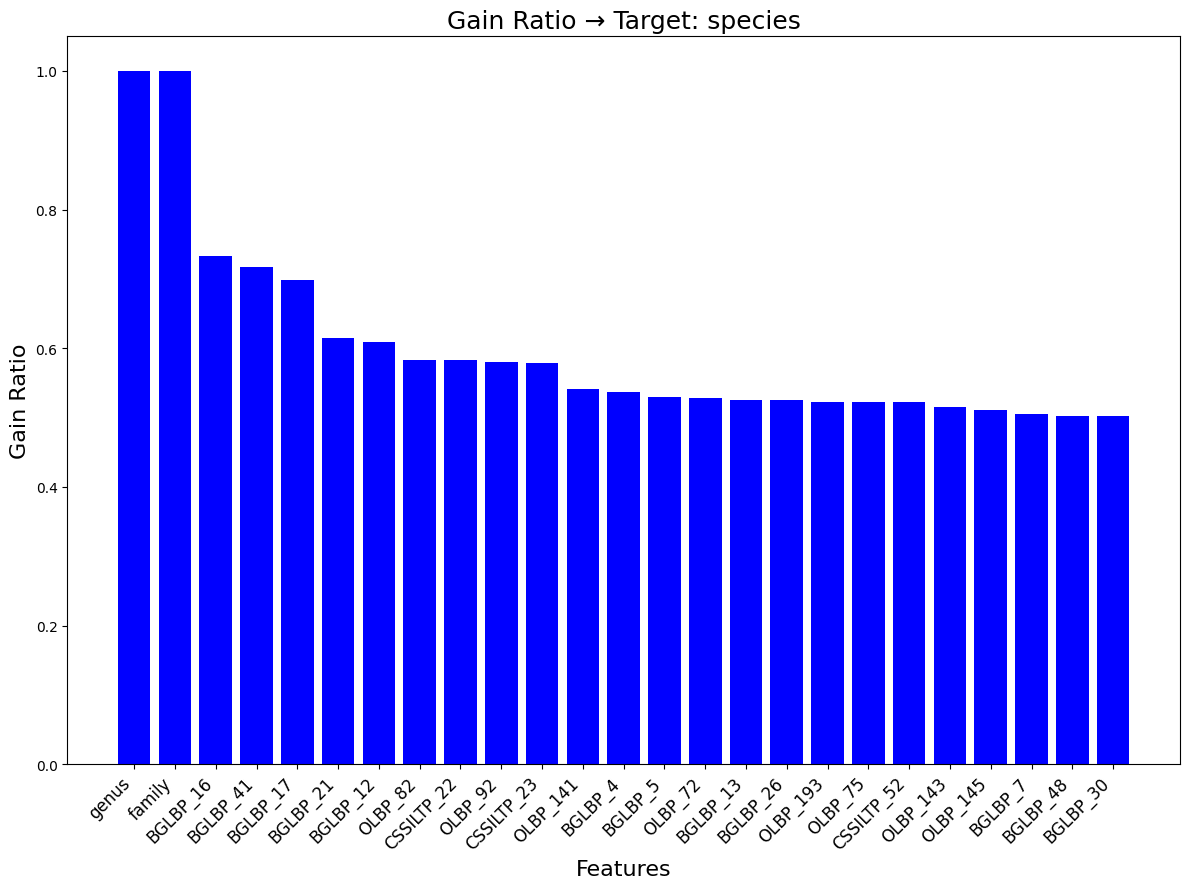

In [ ]:
def pi_chart(dataframe, title = str):    
    dataframe = dataframe.filter((pl.col("family") >= 1) & (pl.col("family") <= 60))
    counts = (
        dataframe.with_columns(((pl.col("family") - 1) // 5).alias("bin"))
        .group_by("bin")
        .agg(pl.len().alias("n"))
    )
    counts = (
        pl.DataFrame({"bin": list(range(12))})
        .join(counts, on="bin", how="left")
        .with_columns(pl.col("n").fill_null(0))
        .sort("bin")
    )
    labels = [f"{i*5+1}-{i*5+5}" for i in range(12)]
    sizes  = counts["n"].to_list()
    plt.figure(figsize=(7,7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.tight_layout()
    plt.show()


def ppread(file):
    df = pl.read_parquet(file)
    return df


def shape(df, label: str = "DataFrame"):
    h, w = len(df), len(df.columns)
    logInfo(f"{label} Dimension (H x W): {h} x {w}")
    
    
def clean_raw(x, y, z):
    for file in x.glob("*.csv"):
        name = file.stem.split("_")[1]
        df = pl.read_csv(file, has_header = False)
        ncols = len(df.columns)
        new_headers = z + [f"{name}_{i}" for i in range(1, ncols - len(z) + 1)]
        df = df.rename(dict(zip(df.columns, new_headers)))
        df.write_parquet(y / f"{name}.parquet")
        logInfo(f"Added Headings {name}, Rows x Cols: {len(df)} x {len(df.columns)}")
    
    
def check_delete(file):
    if file.exists():
        file.unlink()
        logInfo(f"Removed {file}")
        
        
def make_master(x, y, z):
    files = sorted(x.glob("*.parquet"))
    if len(files) != 7:
        logInfo("Not all files found")
    else:
        dfs = [pl.read_parquet(f) for f in files]
        master = dfs[0]
        for df in dfs[1:]:
            feat_cols = [c for c in df.columns if c.lower() not in y]
            master = master.hstack(df.select(feat_cols))        
        master.write_parquet(z)
        
def distribution_vs_expected(df: pl.DataFrame, classes: str):
    exp_even = len(df) / df.select(pl.col(classes).n_unique()).item()
    LIMITS = {"family": 60, "genus": 128, "species": 927}
    full   = pl.DataFrame({classes: range(1, LIMITS[classes] + 1)})
    counts = df.group_by(classes).agg(pl.len().alias("n"))
    joined = full.join(counts, on=classes, how="left")
    missing = joined.filter(pl.col("n").is_null()).get_column(classes).to_list()
    dev = (
        joined.with_columns((pl.col("n").fill_null(0) - exp_even).alias("dev"))
            .sort(classes)
    )
    plt.figure(figsize=(11,4))
    plt.bar(dev.get_column(classes).to_list(), dev["dev"].to_list(), width=0.9, label="Actual − Expected")
    plt.axhline(0, linewidth=1)
    handle = Line2D([0],[0], color='none')
    label  = f"Missing {classes}: " + (", ".join(map(str, missing)) if missing else "None")
    plt.legend([handle], [label], loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
    N = LIMITS[classes]
    step = 5 if N <= 60 else (10 if N <= 150 else 50)
    plt.xticks(range(step, N + 1, step))

    plt.xlabel(classes.capitalize()); plt.ylabel("Actual − Expected")
    plt.title(f"Deviation per {classes.capitalize()} (expected ≈ {exp_even:.2f}/{classes})")
    plt.tight_layout()
    plt.show()

def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * log2(p) for p in probabilities if p > 0])


def information_gain(df, feature, target):
    total_entropy = entropy(df[target].to_numpy())
    values, counts = np.unique(df[feature].to_numpy(), return_counts=True)
    weighted_entropy = np.sum([
        (counts[i] / np.sum(counts)) * entropy(df.loc[df[feature] == v, target].to_numpy())
        for i, v in enumerate(values)
    ])
    return total_entropy - weighted_entropy


def intrinsic_information(df, feature):
    values, counts = np.unique(df[feature].to_numpy(), return_counts=True)
    probabilities = counts / len(df)
    return -np.sum([p * log2(p) for p in probabilities if p > 0])


def gain_ratio(df, feature, target):
    ig = information_gain(df, feature, target)
    ii = intrinsic_information(df, feature)
    return ig / ii if ii != 0 else 0


def factorize_all(_df: pd.DataFrame) -> pd.DataFrame:
    out = {}
    for c in _df.columns:
        codes, _ = pd.factorize(_df[c].fillna("__NA__"), sort=True)
        codes = np.where(codes < 0, codes.max() + 1, codes)
        out[c] = codes.astype(np.int64, copy=False)
    return pd.DataFrame(out)


def features_for(df_cols, target: str) -> list[str]:
    feats = [c for c in df_cols if c != target]
    if target == "family":
        feats = [c for c in feats if c not in ("genus", "species")]
    elif target == "genus":
        feats = [c for c in feats if c != "species"]
    return feats


def run_target(df_enc: pd.DataFrame, target: str, top_k: int = 100):
    feats = features_for(df_enc.columns, target)
    ig_values, gr_values = [], []
    for f in feats:
        ig_values.append(information_gain(df_enc, f, target))
        gr_values.append(gain_ratio(df_enc, f, target))

    ig_df = pd.DataFrame({"Feature": feats, "IG": ig_values, "GR": gr_values})

    ig_sorted = ig_df.sort_values(by="IG", ascending=False).head(top_k)
    plt.figure(figsize=(12, 9))
    plt.bar(ig_sorted["Feature"], ig_sorted["IG"], color="green")
    plt.xlabel("Features", fontsize=16)
    plt.xticks(fontsize=12, rotation=45, ha="right")
    plt.ylabel("Information Gain", fontsize=16)
    plt.title(f"Information Gain → Target: {target}", fontsize=18)
    plt.tight_layout()
    plt.show()

    gr_sorted = ig_df.sort_values(by="GR", ascending=False).head(top_k)
    plt.figure(figsize=(12, 9))
    plt.bar(gr_sorted["Feature"], gr_sorted["GR"], color="blue")
    plt.xlabel("Features", fontsize=16)
    plt.xticks(fontsize=12, rotation=45, ha="right")
    plt.ylabel("Gain Ratio", fontsize=16)
    plt.title(f"Gain Ratio → Target: {target}", fontsize=18)
    plt.tight_layout()
    plt.show()

    return ig_df



# 0.3 | Config / Basic Raw_File Cleaning:

In [111]:
BASE_DIR = Path("Data")
RAW_DIR = BASE_DIR / "Raw"
DAPASETS_DIR = BASE_DIR / "Datasets"
MASTER_DIR = BASE_DIR / "data"

direct = [BASE_DIR, RAW_DIR, DAPASETS_DIR, MASTER_DIR]

HEADINGS = ["family", "genus", "species"]

for d in direct:
    d.mkdir(parents = True, exist_ok = True) 
    logInfo(f"✅ Directory:  {d}")
        
clean_raw(RAW_DIR, DAPASETS_DIR, HEADINGS)

INFO: ✅ Directory:  Data
INFO: ✅ Directory:  Data\Raw
INFO: ✅ Directory:  Data\Datasets
INFO: ✅ Directory:  Data\data
INFO: Added Headings BGLBP, Rows x Cols: 293830 x 57
INFO: Added Headings CSLBP, Rows x Cols: 293830 x 18
INFO: Added Headings CSSILTP, Rows x Cols: 293830 x 110
INFO: Added Headings OLBP, Rows x Cols: 293830 x 206
INFO: Added Headings SCSLBP, Rows x Cols: 293830 x 19
INFO: Added Headings SILTP, Rows x Cols: 293830 x 82
INFO: Added Headings Tchebyshev, Rows x Cols: 293830 x 62


# 0.4 | Make Master Dataset


In [112]:
DATA: Path = Path("Data/data/df_0.01.parquet")

In [113]:
check_delete(DATA)
make_master(DAPASETS, HEADINGS, DATA)
logInfo(f"Master Data is {round((os.stat(DATA).st_size)/1_000_000, 1)}MB")

INFO: Removed Data\data\df_0.01.parquet
INFO: Master Data is 32.9MB


In [114]:
df = ppread(DATA)
shape(df)
logInfo(df.head())

INFO: DataFrame Dimension (H x W): 293830 x 536
INFO: shape: (5, 536)
┌────────┬───────┬─────────┬─────────┬───┬──────────────┬──────────────┬─────────────┬─────────────┐
│ family ┆ genus ┆ species ┆ BGLBP_1 ┆ … ┆ Tchebyshev_5 ┆ Tchebyshev_5 ┆ Tchebyshev_ ┆ Tchebyshev_ │
│ ---    ┆ ---   ┆ ---     ┆ ---     ┆   ┆ 6            ┆ 7            ┆ 58          ┆ 59          │
│ i64    ┆ i64   ┆ i64     ┆ i64     ┆   ┆ ---          ┆ ---          ┆ ---         ┆ ---         │
│        ┆       ┆         ┆         ┆   ┆ i64          ┆ i64          ┆ i64         ┆ i64         │
╞════════╪═══════╪═════════╪═════════╪═══╪══════════════╪══════════════╪═════════════╪═════════════╡
│ 42     ┆ 140   ┆ 623     ┆ 69      ┆ … ┆ 66           ┆ 88           ┆ 164         ┆ 108         │
│ 42     ┆ 140   ┆ 623     ┆ 62      ┆ … ┆ 63           ┆ 86           ┆ 168         ┆ 105         │
│ 42     ┆ 140   ┆ 623     ┆ 61      ┆ … ┆ 64           ┆ 88           ┆ 168         ┆ 104         │
│ 42     ┆ 140   ┆ 62

# 1.00 | EDA: Exploratory Data Analysis

* ### 1.01 | Cleaning Duplicate Rows:

In [ ]:
DEDUP: Path = Path("Data/data/df_0.02.parquet")
check_delete(DEDUP)

df = ppread(DATA)
before, Before_Row_Deduplication = len(df), df
df_unique = df.unique()
after, After_Row_Deduplication = len(df_unique), df_unique
removed = before - after

After_Row_Deduplication.write_parquet(DEDUP)

logInfo(f"🗑️  Removed {removed} duplicate rows (kept {after})")

INFO: Removed Data\data\df_0.02.parquet
INFO: DataFrame Dimension (H x W): 146880 x 536
INFO: 🗑️  Removed 146950 duplicate rows (kept 146880)


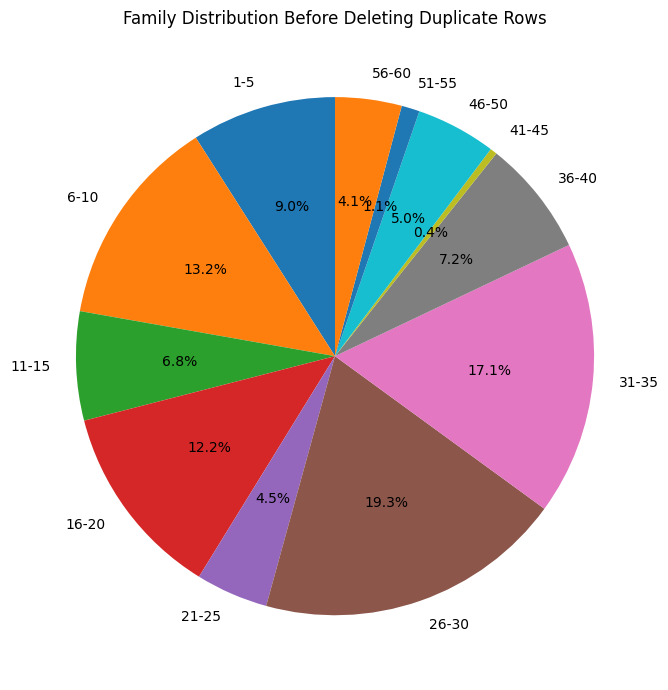

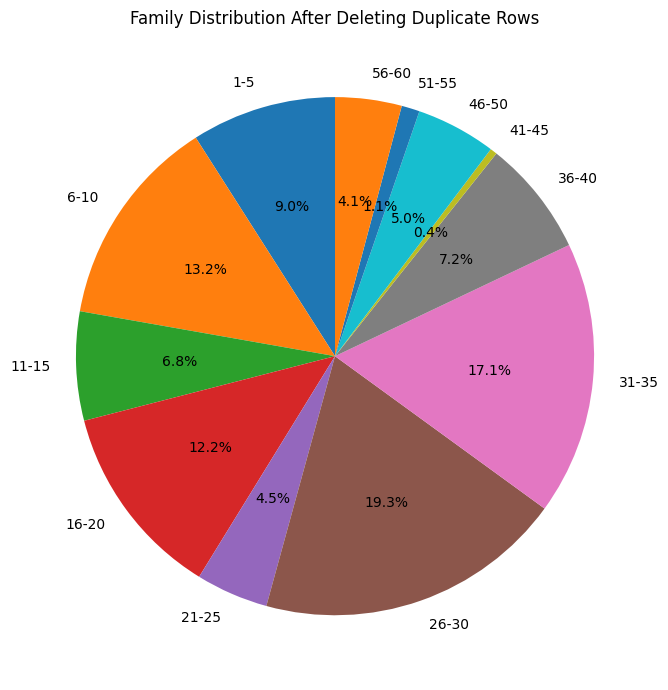

In [120]:
pi_chart(Before_Row_Deduplication, "Family Distribution Before Deleting Duplicate Rows")
pi_chart(After_Row_Deduplication,  "Family Distribution After Deleting Duplicate Rows")

* ### 1.02 | Cleaning Constant-value Columns:

In [121]:
df = ppread(DEDUP)
constant_cols = [
    col for col in df.columns
    if df.select(pl.col(col).n_unique()).to_series()[0] == 1
]
logInfo(f"Constant columns: {constant_cols}")
if constant_cols:
    df = df.drop(constant_cols)
shape(df)

INFO: Constant columns: []
INFO: DataFrame Dimension (H x W): 146880 x 536


**No Constant Columns: In Original Master**

Worth noting this was explored for both the master and unique_rows in excel using:

For master.csv:

(IN D293835) =SORT(UNIQUE(D2:D293831,FALSE)) for all columns D -> TP, then uses COUNTA(D293835#) to count cells in the SORT(UNIQUE) array, and confirmed that **at minimum all features have at least 2 levels**.

* ### 1.03 | Cleaning Duplicate Columns:

In [125]:
df = ppread(DEDUP)
df = df.transpose(include_header=False).unique(subset = None).transpose()
shape(df)

INFO: DataFrame Dimension (H x W): 146880 x 536


No Duplicate Columns Found, no need to do any Header Mapping

Future reference if shape differs from previous (found duplicate columns), to identify the column removed and apply the correct headers:

In [ ]:
df_trans = df.transpose(inlude_header = True).with_row_index("col_idx")
df_unique = df_trans.unique(subset = df_trans.columns[2:], keep = "first")
unique_cols = df_unique["col_idx"].to_list()
df = df.select([df.columns[i] for i in kept_idx])

### General Distribution Graphs

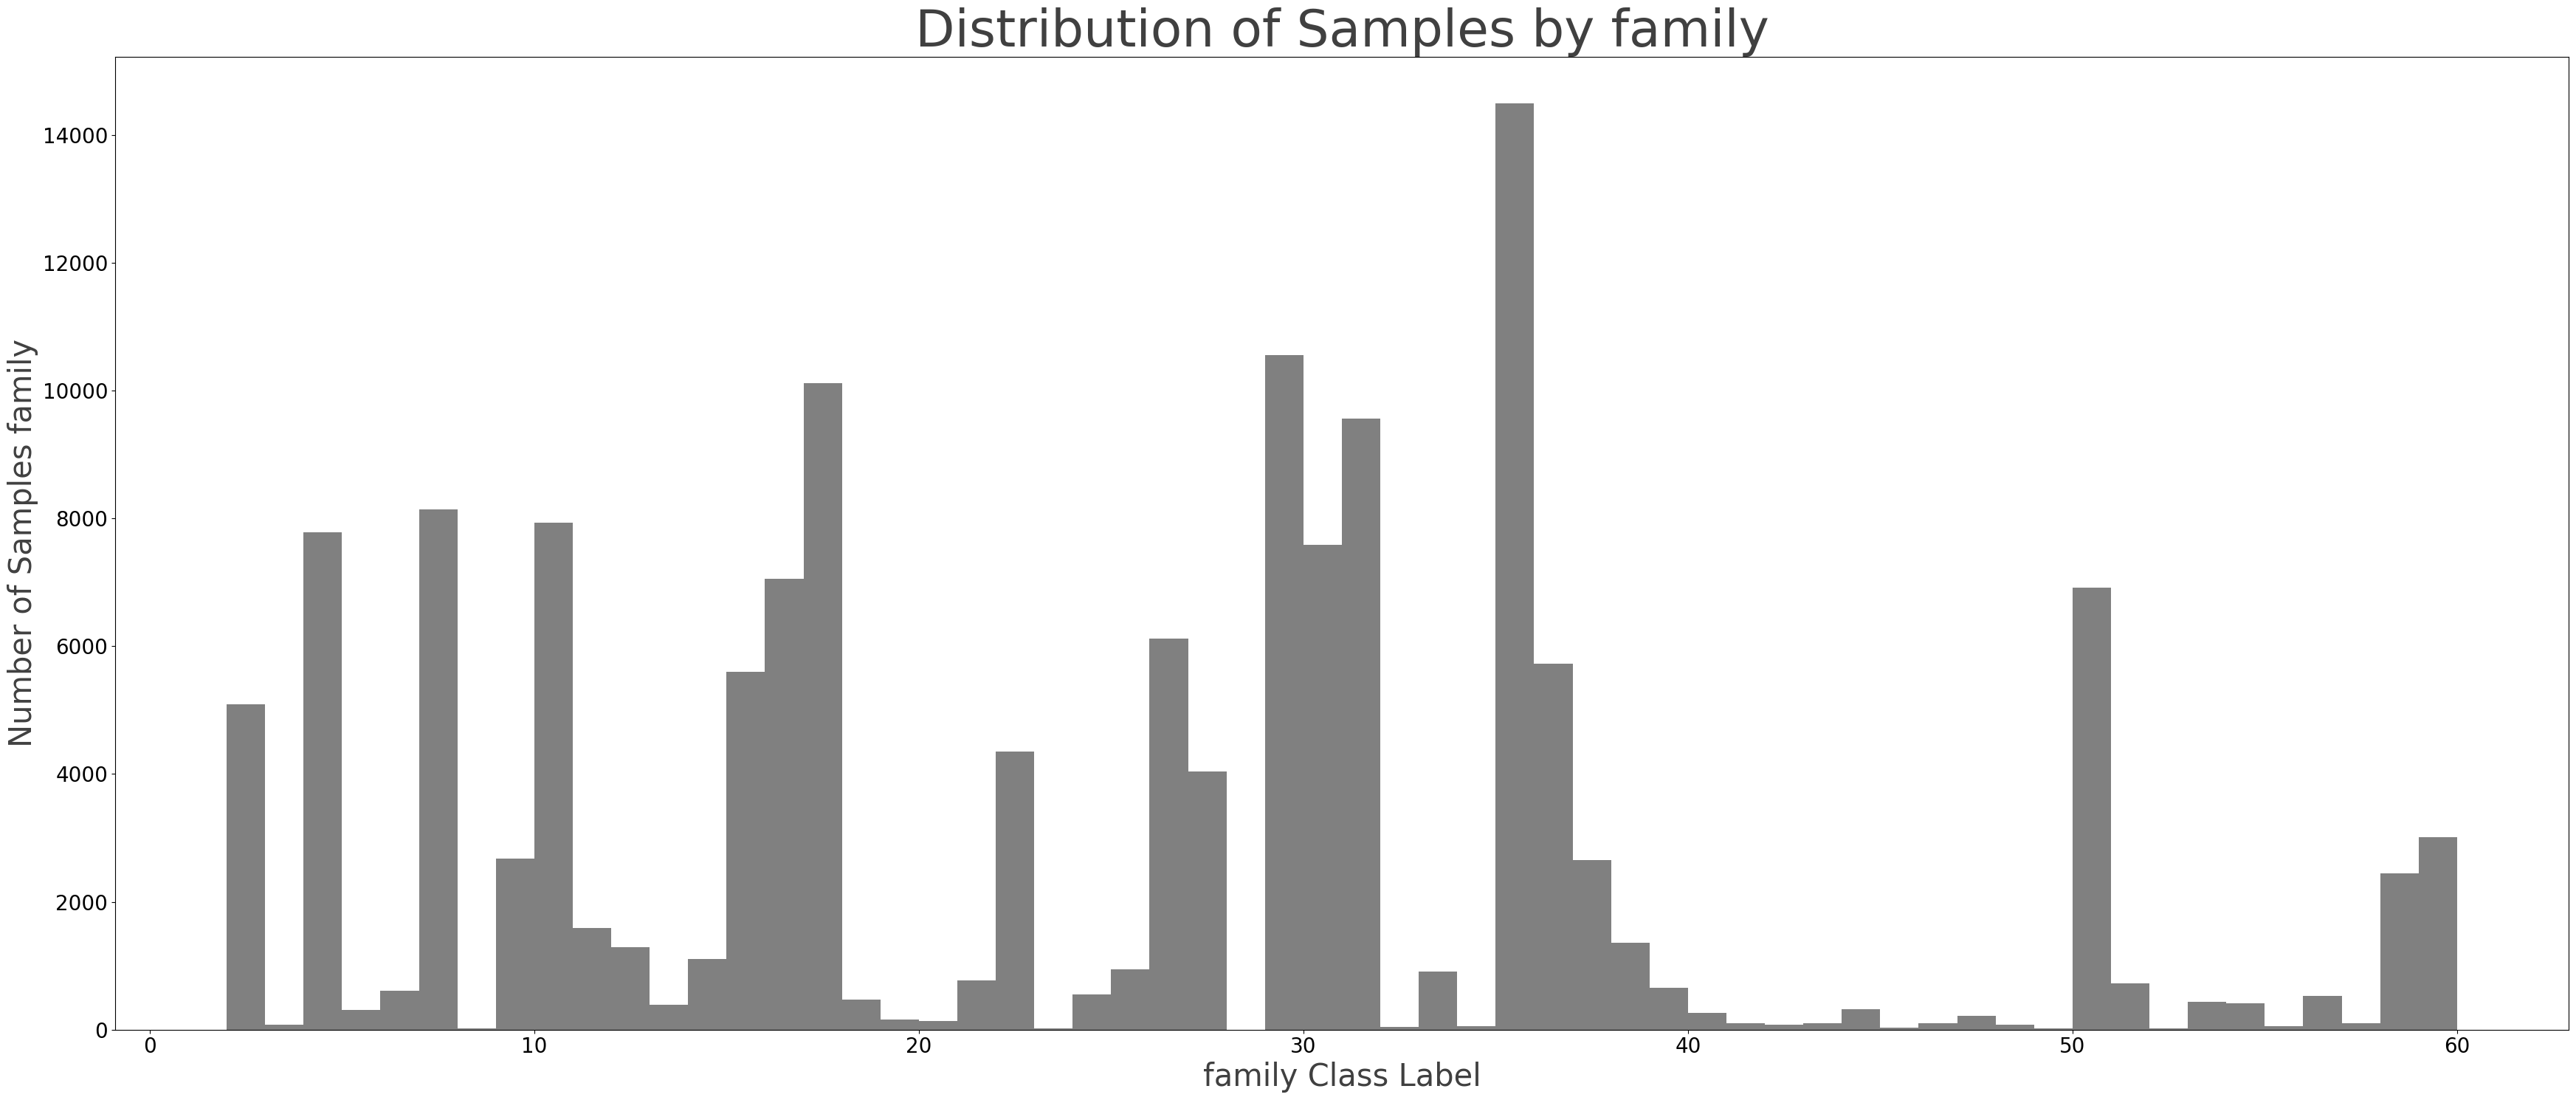

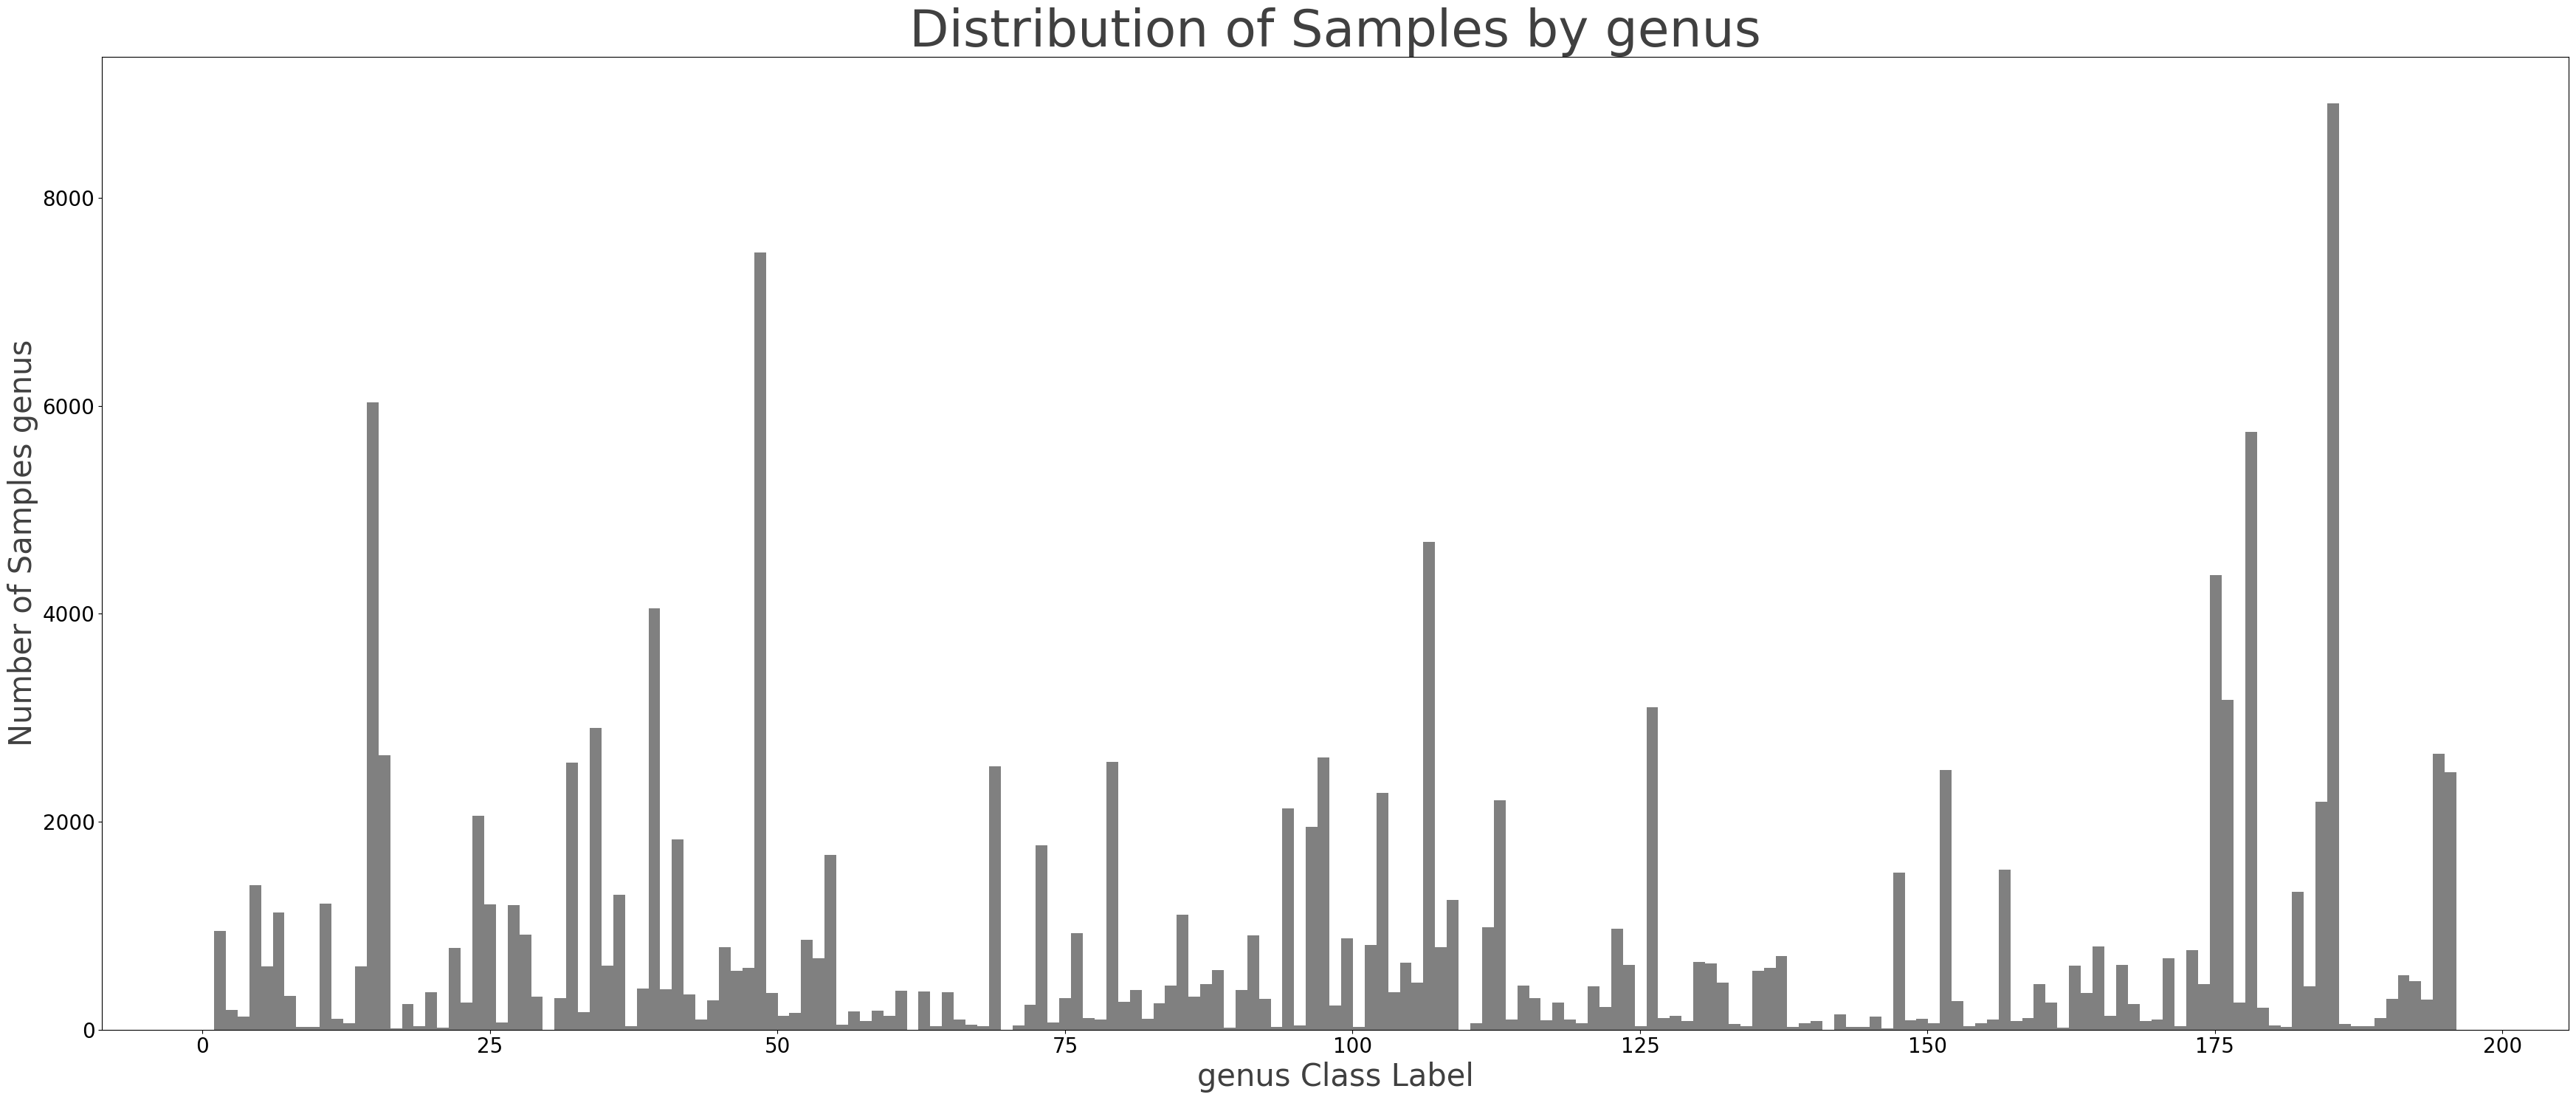

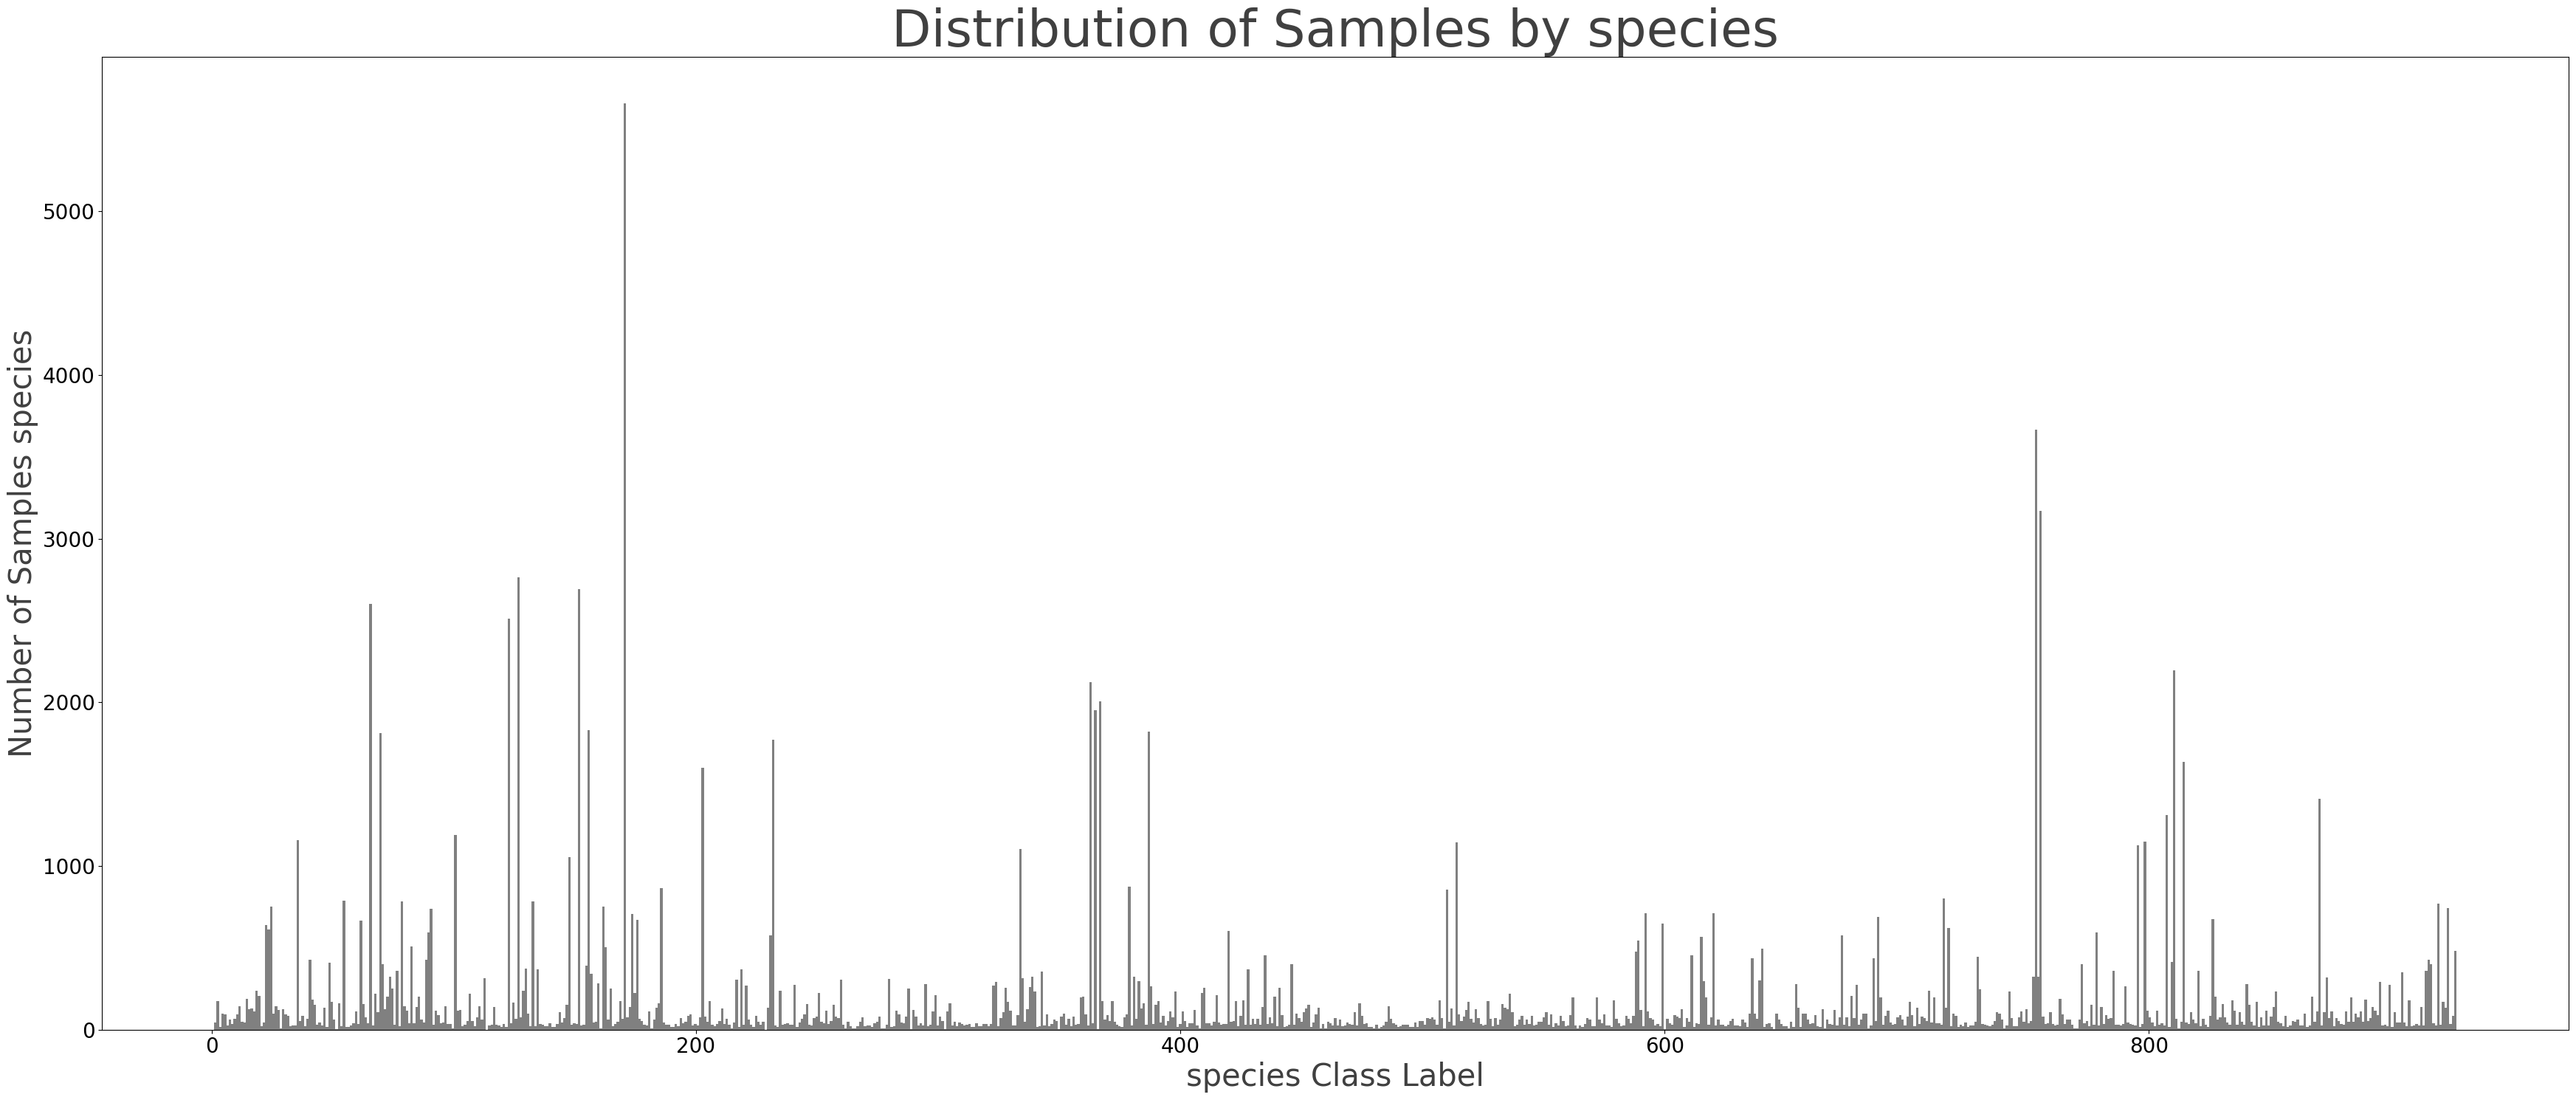

In [ ]:
classes = ["family", "genus", "species"]

df = ppread(DEDUP)

for item in classes:
    s = df[item]                     
    bins = int(s.n_unique())
    data = s.to_numpy()
    fig, ax = plt.subplots(figsize=(35, 15))
    ax.hist(data, bins=bins, color="grey")
    ax.set_title(f"Distribution of Samples by {item}", fontsize=50, alpha=0.75)
    ax.set_ylabel(f"Number of Samples {item}", fontsize=30, alpha=0.75)
    ax.set_xlabel(f"{item} Class Label", fontsize=30, alpha=0.75)
    ax.tick_params(axis="x", labelrotation=0, labelsize=20)
    ax.tick_params(axis="y", labelrotation=0, labelsize=20)
    plt.tight_layout()
    plt.show()

### Family Distribution vs Expected (even) Distribution:

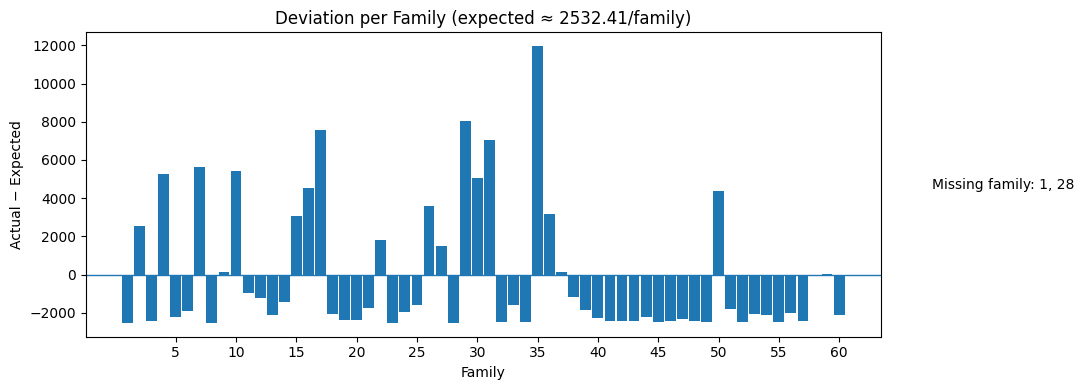

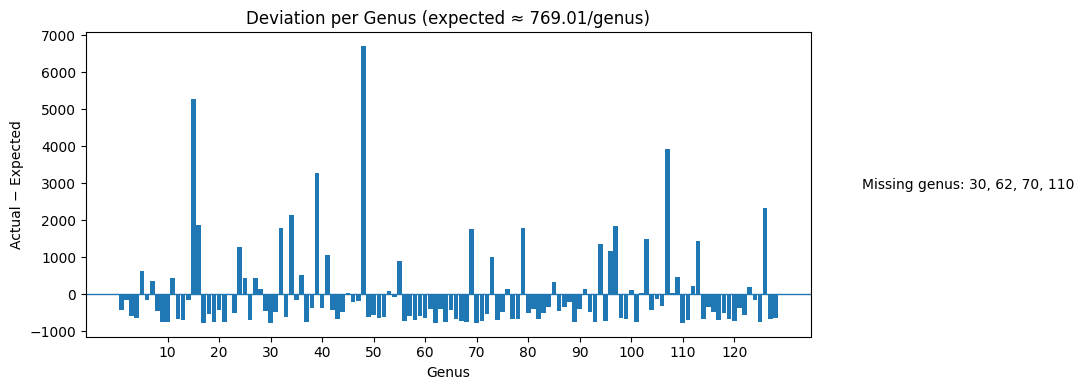

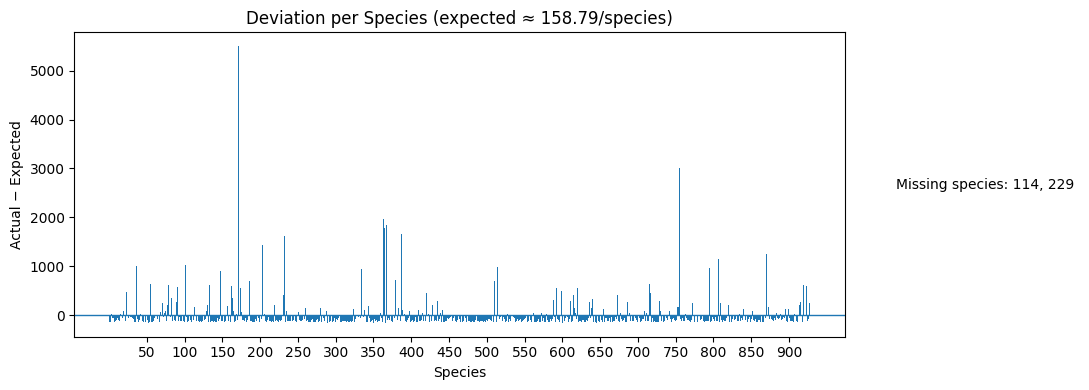

In [143]:
classes = ["family", "genus", "species"]
for c in classes:
    df = ppread(DEDUP)
    distribution_vs_expected(df, c)

### Information Gain (Top - 25) Features:


>>> Target: family


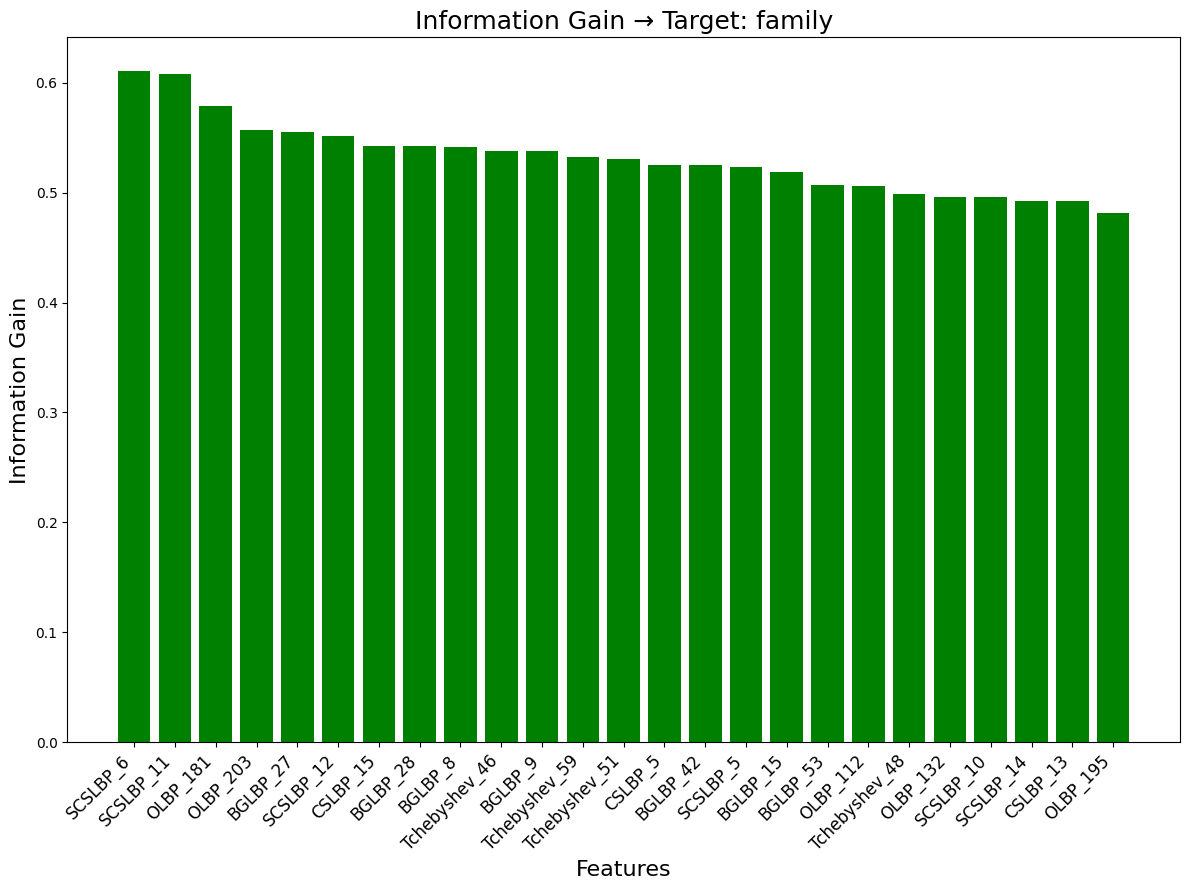

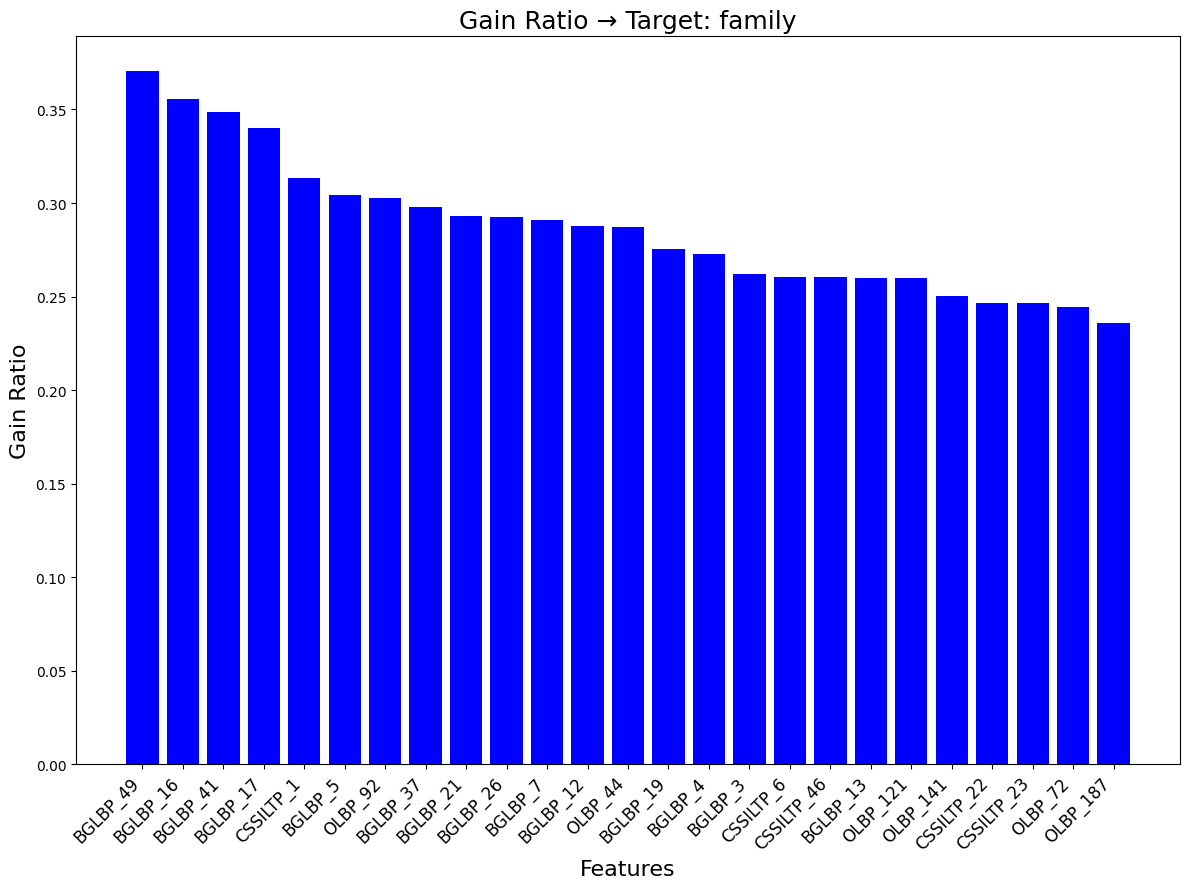


>>> Target: genus


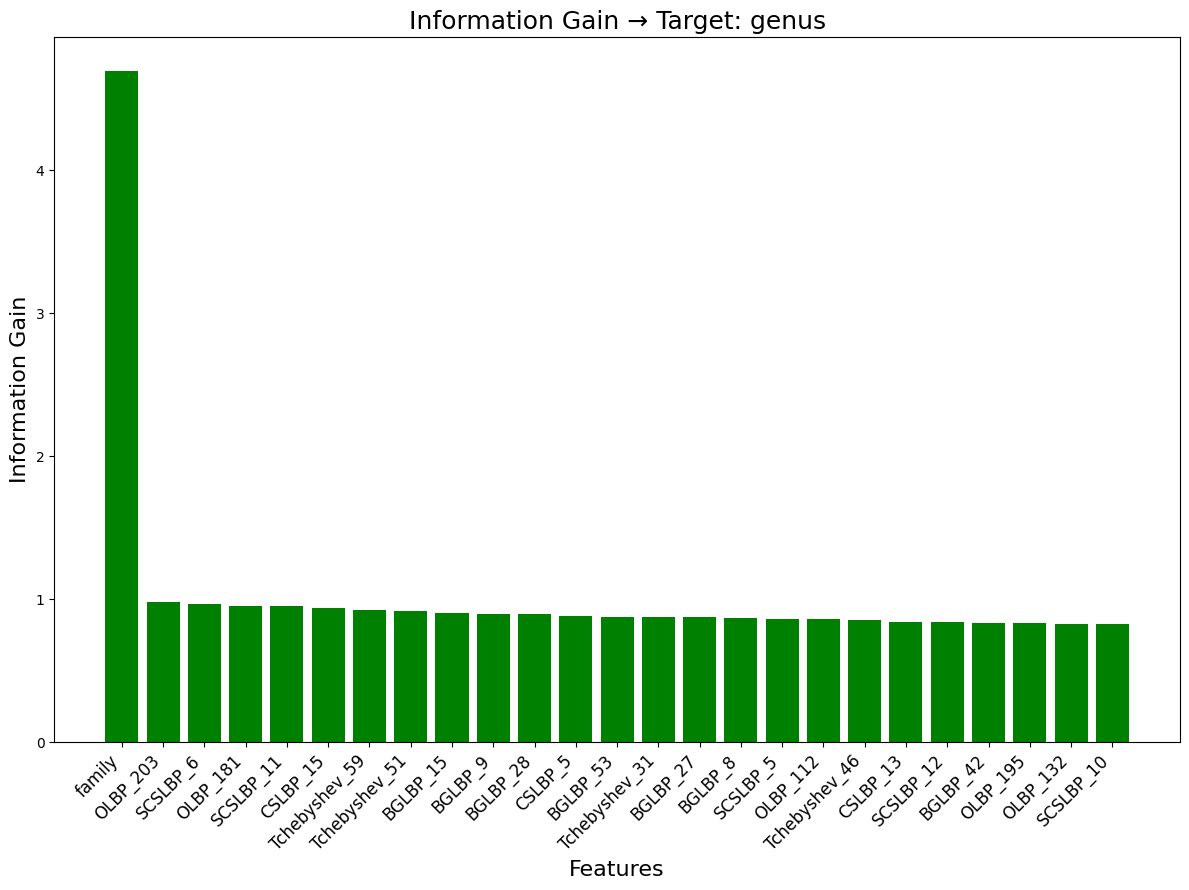

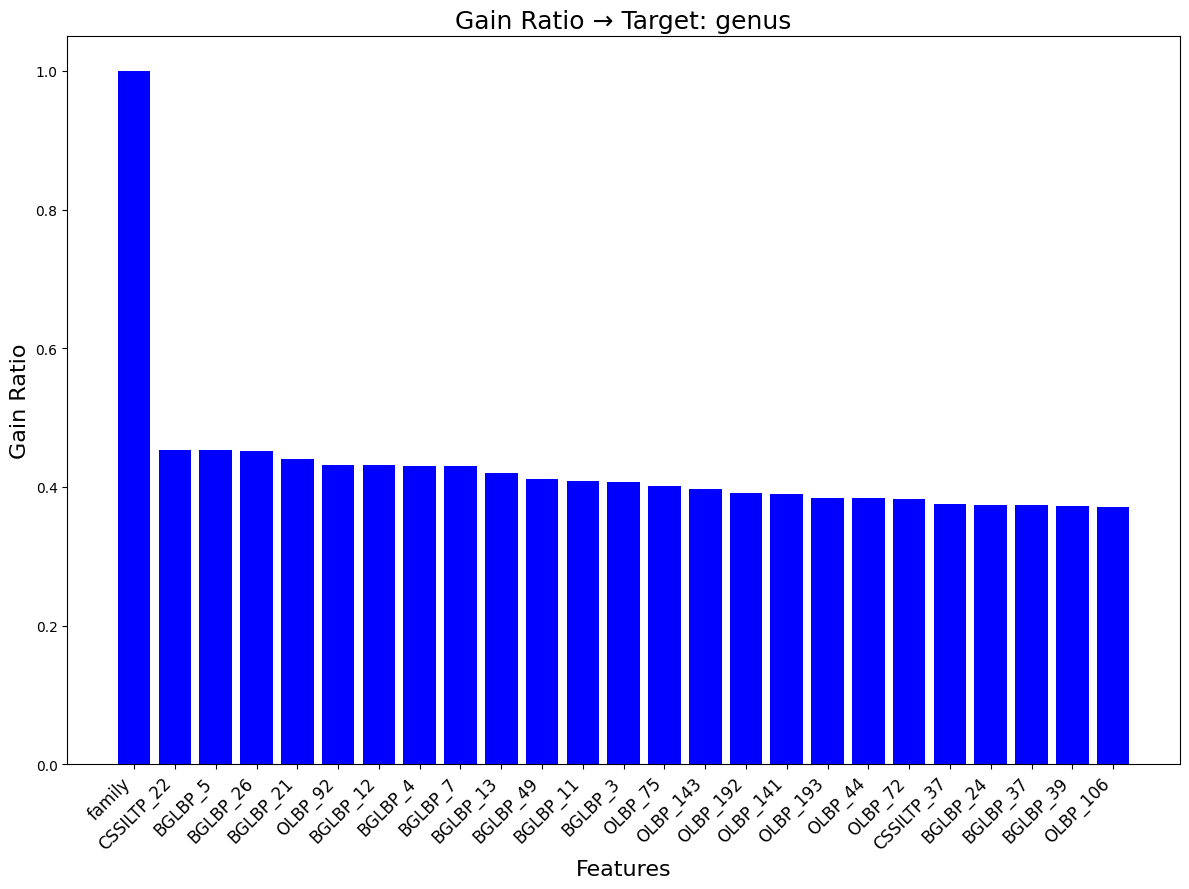


>>> Target: species


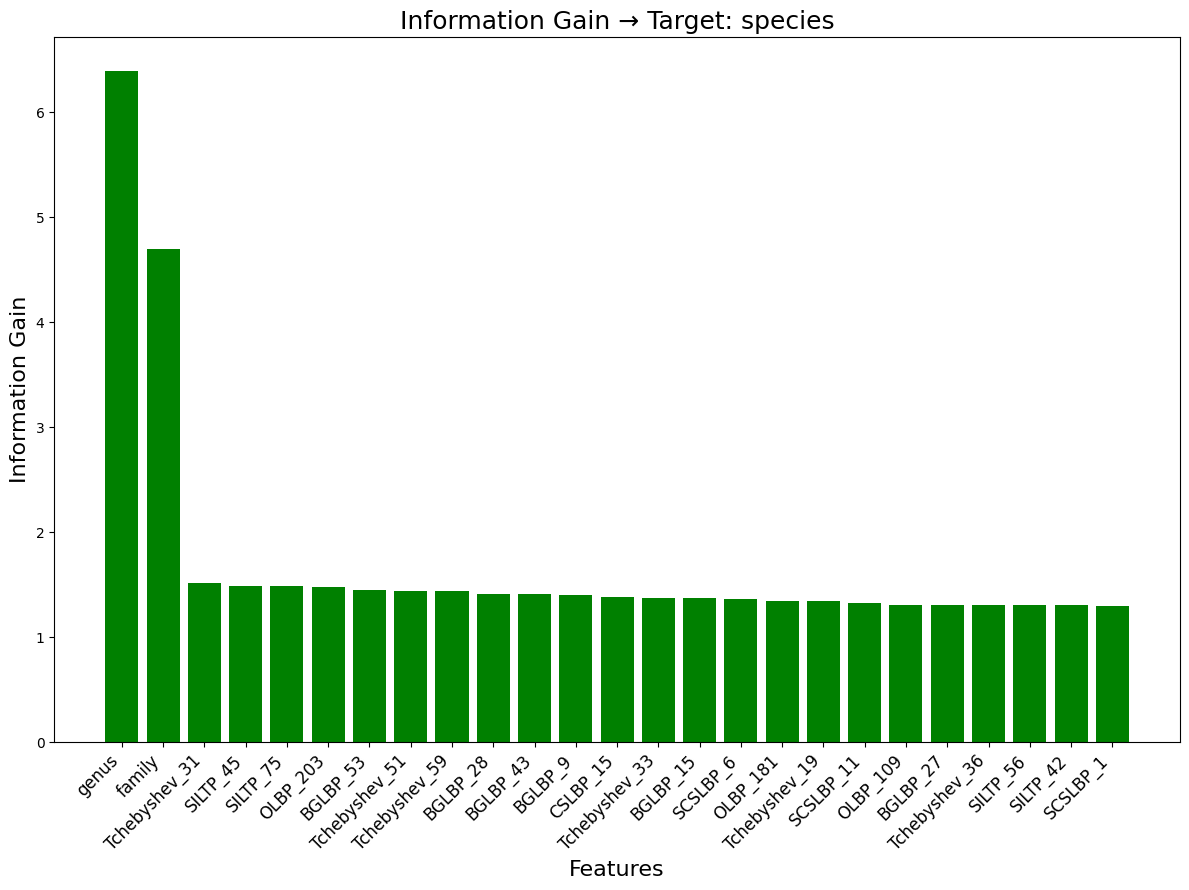

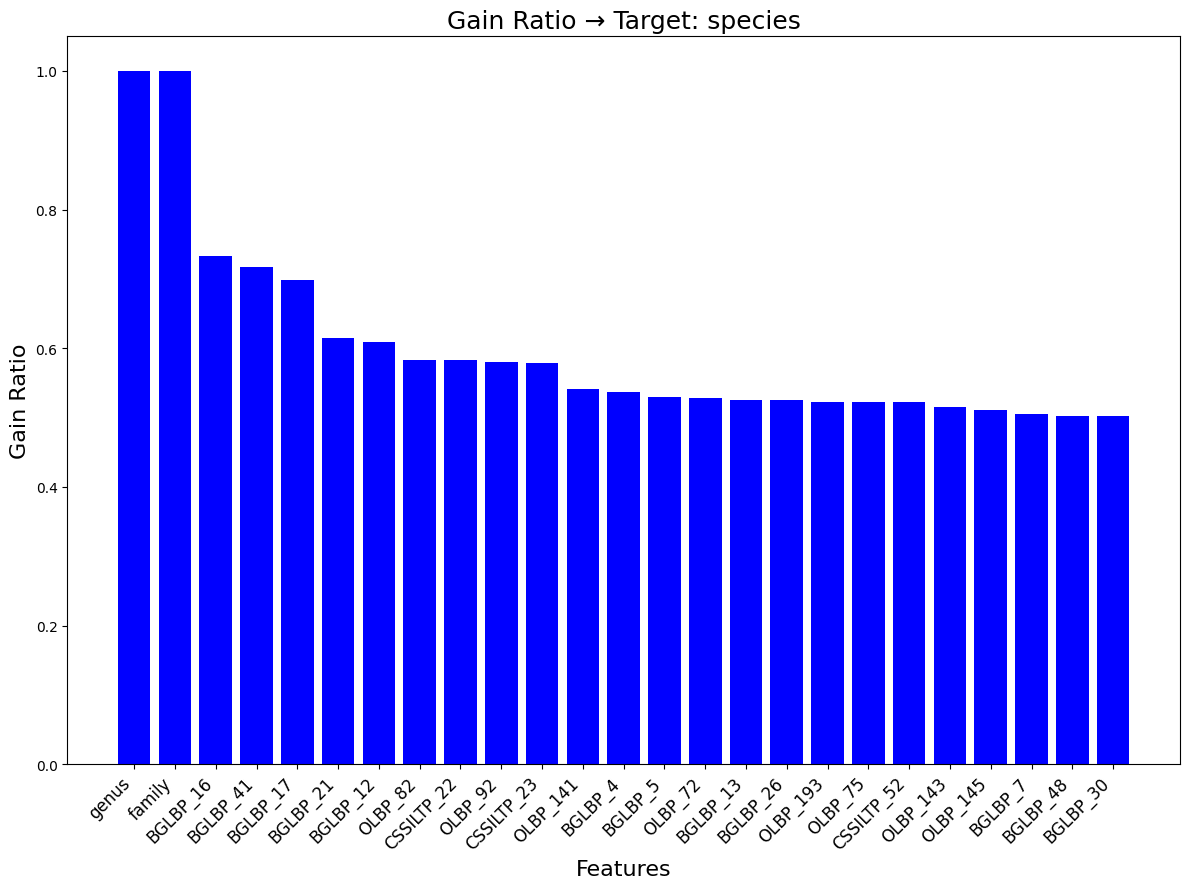

In [160]:
df = pd.read_parquet(DEDUP)   
df_enc = factorize_all(df)
for tgt in ("family", "genus", "species"):
    if tgt in df_enc.columns:
        print(f"\n>>> Target: {tgt}")
        _ = run_target(df_enc, tgt, top_k=25)
    else:
        print(f"⚠️ Missing column: {tgt}")

The most performative indicators are the classes themselves (no surprise)

As the data is hierarchal in structure:

Family -> Genus -> Species

The best process for Species classifcation is:

1) Binary Classification for Family Actual-Estimated. Where 1 is to represent > 0. To group family's and reduce skewed data.

1) Classifying family (1/60)

2) Adding Classified or Predicted family to a new train/test

3) Predict Genus (with family classification)



# 2.00 | Exploratory Data Analysis

INFO: DataFrame Dimension (H x W): 293830 x 536


(a) - Distribution checks

Count of asamples per family/genus/species

* ### 2.01 | Mutual Information:

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ======= your template funcs (unchanged logic) =======


## Notes

It was found that in a species classification, both family and genus are extremely performative, informationally rich features.

The best way to really go about this, would be:

Where for test set / family / genus / species are unknown:

family classification -> Using predicted family in a genus classification -> Using both Predicted Family and Genus in species classification

# Model 1: Random Under Sampler Boost Classification:


In [ ]:
# pip: scikit-learn, imbalanced-learn
from dataclasses import dataclass
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler as RUS
from imblearn.over_sampling  import RandomOverSampler  as ROS

@dataclass
class StageCfg:
    sampler: object       # e.g., RUS(sampling_strategy="auto", random_state=42) or ROS(...)
    clf: object           # e.g., RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)
    folds: int = 5
    random_state: int = 42

class HierCascade:
    def __init__(self, family_cfg: StageCfg, genus_cfg: StageCfg, species_cfg: StageCfg):
        self.family_cfg  = family_cfg
        self.genus_cfg   = genus_cfg
        self.species_cfg = species_cfg
        self.family_pipe = None
        self.genus_pipe  = None
        self.species_pipe= None

    @staticmethod
    def _oof_preds(X, y, pipe, folds=5, rs=42):
        skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=rs)
        oof = np.empty_like(y)
        for tr, va in skf.split(X, y):
            pipe.fit(X[tr], y[tr])
            oof[va] = pipe.predict(X[va])
        score = f1_score(y, oof, average="macro")
        pipe.fit(X, y)  # final fit on all data
        return oof, score, pipe

    def fit(self, df: pd.DataFrame, y_cols=("family","genus","species")):
        y_fam = df[y_cols[0]].to_numpy()
        y_gen = df[y_cols[1]].to_numpy()
        y_spe = df[y_cols[2]].to_numpy()
        X = df.drop(columns=list(y_cols)).to_numpy()

        # FAMILY
        self.family_pipe = Pipeline([("sampler", self.family_cfg.sampler),
                                     ("clf",     self.family_cfg.clf)])
        fam_oof, fam_f1, self.family_pipe = self._oof_preds(
            X, y_fam, self.family_pipe, self.family_cfg.folds, self.family_cfg.random_state
        )

        # GENUS (stack family prediction)
        Xg = np.column_stack([X, fam_oof])
        self.genus_pipe = Pipeline([("sampler", self.genus_cfg.sampler),
                                    ("clf",     self.genus_cfg.clf)])
        gen_oof, gen_f1, self.genus_pipe = self._oof_preds(
            Xg, y_gen, self.genus_pipe, self.genus_cfg.folds, self.genus_cfg.random_state
        )

        # SPECIES (stack family+genus)
        Xs = np.column_stack([X, fam_oof, gen_oof])
        self.species_pipe = Pipeline([("sampler", self.species_cfg.sampler),
                                      ("clf",     self.species_cfg.clf)])
        spe_oof, spe_f1, self.species_pipe = self._oof_preds(
            Xs, y_spe, self.species_pipe, self.species_cfg.folds, self.species_cfg.random_state
        )

        print(f"F1-macro — Family:  {fam_f1:.3f} | Genus: {gen_f1:.3f} | Species: {spe_f1:.3f}")
        return self

    def predict(self, df: pd.DataFrame, y_cols=("family","genus","species")):
        X = df.drop(columns=list(y_cols)).to_numpy()
        fam_hat = self.family_pipe.predict(X)
        Xg = np.column_stack([X, fam_hat])
        gen_hat = self.genus_pipe.predict(Xg)
        Xs = np.column_stack([X, fam_hat, gen_hat])
        spe_hat = self.species_pipe.predict(Xs)
        out = df.copy()
        out["pred_family"] = fam_hat
        out["pred_genus"]  = gen_hat
        out["pred_species"]= spe_hat
        return out[["pred_family","pred_genus","pred_species"]]


* ### 2.02 | Information Gain:

.

* **Logistic Regression**

.

##### Fixed using undersampling on majority classes:

In [ ]:
from imblearn.under_sampling import RandomUnderSampler as RUS
from imblearn.over_sampling import RandomOverSampler as ROS

In [ ]:
undersampler = RUS(sampling_strategy = "auto", random_state = 42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)
classifier

##### Fixed using oversampling on minority classes:

In [ ]:
im

.

.

.

# Species Distribution Lowest to Highest


### Since true, creates a masterdataset


Remove 

# Assignment 1:

Preliminary Analysis of the Classes


In [ ]:
import polars as pl
import matplotlib.pyplot as plt

df = pl.read_parquet(P_MASTER)

# frequency table
# count per family
# count how many rows per family
freq = (
    df.group_by("family")
      .agg(pl.len().alias("count"))
      .sort("count", descending=True)
)

# assign family rank (1,2,3,...)
freq = freq.with_row_index("rank", offset=1)

# bin families by rank
freq = freq.with_columns([
    (
        pl.when(pl.col("rank").is_between(1,10)).then(pl.lit("1–10"))
        .when(pl.col("rank").is_between(11,20)).then(pl.lit("11–20"))
        .when(pl.col("rank").is_between(21,30)).then(pl.lit("21–30"))
        .when(pl.col("rank").is_between(31,40)).then(pl.lit("31–40"))
        .when(pl.col("rank").is_between(41,50)).then(pl.lit("41–50"))
        .when(pl.col("rank").is_between(51,60)).then(pl.lit("51–60"))
        .otherwise(pl.lit("60+"))
        .alias("bin")
    )
])

# sum total species counts per bin
binned = (
    freq.group_by("bin")
        .agg(pl.col("count").sum().alias("total_rows"))
        .sort("bin")
)

print(binned)

# plot
binned_pd = binned.to_pandas()
binned_pd.plot(
    kind="bar",
    x="bin",
    y="total_rows",
    legend=False,
    figsize=(8,5),
    title="Total Species Rows by Family Rank Range"
)
plt.ylabel("Total Rows")
plt.xlabel("Family Rank Range")
plt.tight_layout()
plt.show()

In [ ]:
import polars as pl

df = pl.read_parquet(P_MASTER)

labels = ["family", "genus", "species"]
feat_cols = [c for c in df.columns if c not in labels]

X = df.select(feat_cols).to_numpy
y_sp = df["species"].to_numpy()
y_ge = df["genus"].to_numpy()
y_fa = df["family"].to_numpy()


sp_ge = (df.select(["species","genus"])
           .unique()
           .group_by("species")
           .agg(pl.n_unique("genus").alias("k"))
        )
bad_sp = sp_ge.filter(pl.col("k") != 1).height
# genus -> unique family
ge_fa = (df.select(["genus","family"])
           .unique()
           .group_by("genus")
           .agg(pl.n_unique("family").alias("k"))
        )
bad_ge = ge_fa.filter(pl.col("k") != 1).height

print(f"Hierarchy OK? species→genus unique={bad_sp==0}, genus→family unique={bad_ge==0}")


https://medium.com/@Jerrylzj/methods-for-multi-class-imbalanced-data-classification-574ab4b73d09

https://medium.com/data-science/class-imbalance-strategies-a-visual-guide-with-code-8bc8fae71e1a

In [ ]:
import imblearn

crime_df = pd.concat([pd.DataFrame(us_crime['data'], columns = [f'data_{i}' for i in range(us_crime.data.shape[1])]),
           pd.DataFrame(us_crime['target'], columns = ['target'])], axis = 1)

# Split data into train test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(crime_df.drop('target', axis = 1), 
                                                    crime_df['target'], 
                                                    test_size = 0.4, 
                                                    random_state = 42)

Here’s how to we can perform oversampling on our dataset.

from imblearn.over_sampling import RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Perform random oversampling
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train_pca, y_train)


Or undersample majority class

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Perform random sampling
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train_pca, y_train)

# Function for plotting is in Notebook.
# Insert link here.



In [ ]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from joblib import Parallel, delayed

ignore = {"family", "genus"}
X_cols = [c for c in df.columns if c not in ignore and c != "species"]
X = df.select(X_cols).to_numpy()
y = df["species"].to_pandas().astype("category").cat.codes

# parallel wrapper
def mi_one(col):
    try:
        return mutual_info_classif(X[:, [col]], y, random_state=0)[0]
    except Exception:
        return 0.0

mi = Parallel(n_jobs=-1, backend="loky")(delayed(mi_one)(i) for i in range(X.shape[1]))
mi = np.array(mi)

idx = np.argsort(mi)[::-1][:100]
plt.figure(figsize=(10,8))
plt.barh(np.array(X_cols)[idx], mi[idx])
plt.gca().invert_yaxis()
plt.title("Top 100 Features by Information Gain (species)")
plt.xlabel("Mutual Information")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Scale the dataset on both train and test sets.
# Note that we fit MinMaxScaler on X_train only, not on the entire dataset.
# This prevents data leakage from test set to train set.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Perform PCA Decomposition on both train and test sets
# Note that we fit PCA on X_train only, not on the entire dataset.
# This prevents data leakage from test set to train set.
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Function for plotting dataset 
def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

# Plot dataset
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_pca, y_train, ax, title='Original Dataset')

In [ ]:
# species_classifier.py
import polars as pl
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    balanced_accuracy_score,
    f1_score,
    top_k_accuracy_score,
)
from sklearn.pipeline import Pipeline

# ---------------- CONFIG ----------------
DATA_PATH     = r"D:\data\model_frame.parquet"  # your cleaned frame
TARGET        = "species"
MIN_PER_CLASS = 20            # set 0 to keep all classes
TEST_SIZE     = 0.2
RANDOM_STATE  = 42
TOPK          = (3, 5)
OUTDIR        = Path("./ml_out"); OUTDIR.mkdir(exist_ok=True, parents=True)
# ----------------------------------------

# -------- LOAD --------
df = pl.read_parquet(DATA_PATH)

# Ensure target exists
assert TARGET in df.columns, f"{TARGET=} not found"

# Optional: drop extreme tail classes
if MIN_PER_CLASS > 0:
    counts = df.group_by(TARGET).len().rename({"len": "count"})
    kept = counts.filter(pl.col("count") >= MIN_PER_CLASS)[TARGET].to_list()
    dropped = counts.filter(pl.col("count") < MIN_PER_CLASS)
    if dropped.height > 0:
        dropped.write_csv(OUTDIR/"dropped_species_counts.csv")
    df = df.filter(pl.col(TARGET).is_in(kept))

# Separate X/y
X_cols = [c for c in df.columns if c != TARGET]
X = df.select(X_cols).to_numpy()
y = df[TARGET].to_numpy()

# Train/val split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
)

# -------- MODELS --------
# Baseline 1: Linear + PCA (+ class_weight balanced)
pipe_lr = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("pca", PCA(n_components=0.95, svd_solver="full", random_state=RANDOM_STATE)),
    ("clf", LogisticRegression(
        solver="saga",
        max_iter=2000,
        n_jobs=-1,
        multi_class="multinomial",
        class_weight="balanced",
        random_state=RANDOM_STATE,
    )),
])

# Baseline 2: Tree boosting (fast, robust to scaling)
hgb = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=None,
    max_iter=300,
    l2_regularization=0.0,
    random_state=RANDOM_STATE,
)

# -------- TRAIN --------
pipe_lr.fit(X_train, y_train)
hgb.fit(X_train, y_train)

# -------- EVAL --------
def eval_model(name, model):
    y_pred = model.predict(X_test)
    probs = None
    try:
        probs = model.predict_proba(X_test)
    except Exception:
        pass

    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1_mac = f1_score(y_test, y_pred, average="macro")

    topk = {}
    if probs is not None:
        for k in TOPK:
            topk[f"top{k}"] = top_k_accuracy_score(y_test, probs, k=k)

    print(f"\n=== {name} ===")
    print(f"Balanced Acc: {bal_acc:.4f} | Macro F1: {f1_mac:.4f} " +
          " ".join([f"| Top-{k}: {v:.4f}" for k, v in topk.items()]))

    # Detailed report on frequent classes only (optional)
    report = classification_report(y_test, y_pred, digits=3, zero_division=0, output_dict=True)
    pl.DataFrame([
        {"metric": f"top{k}", "value": v} for k, v in topk.items()
    ] + [
        {"metric": "balanced_accuracy", "value": bal_acc},
        {"metric": "macro_f1", "value": f1_mac},
    ]).write_csv(OUTDIR/f"{name}_metrics.csv")

    # Save per-class report
    # (sklearn returns dict-of-dicts; write a flattened CSV)
    import pandas as pd
    pd.DataFrame(report).T.to_csv(OUTDIR/f"{name}_class_report.csv")

    # Confusion matrix on the top N classes (by freq) to keep it readable
    N = 25
    # map labels to counts on train
    import collections
    ctr = collections.Counter(y_train)
    top_labels = [lbl for lbl, _ in ctr.most_common(N)]
    mask = np.isin(y_test, top_labels)
    cm = confusion_matrix(y_test[mask], y_pred[mask], labels=top_labels)
    pd.DataFrame(cm, index=top_labels, columns=top_labels).to_csv(OUTDIR/f"{name}_confusion_top{N}.csv")

eval_model("logreg_pca", pipe_lr)
eval_model("hgb", hgb)

# -------- ARTIFACTS --------
# Save label map (if species is non-contiguous ints, still useful)
pl.DataFrame({ "species": sorted(np.unique(y)) }).write_csv(OUTDIR/"label_map.csv")

# Save train/test IDs if you have an ID column; otherwise skip
# pl.DataFrame({"idx": ...}).write_csv(OUTDIR/"splits.csv")

print("\nDone.")
